Confusion Matrix (Training):
 [[1458   43]
 [ 156  115]]
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1501
           1       0.73      0.42      0.54       271

    accuracy                           0.89      1772
   macro avg       0.82      0.70      0.74      1772
weighted avg       0.88      0.89      0.87      1772

Confusion Matrix (Test):
 [[350  32]
 [ 51  11]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       382
           1       0.26      0.18      0.21        62

    accuracy                           0.81       444
   macro avg       0.56      0.55      0.55       444
weighted avg       0.79      0.81      0.80       444

MSE: 3093004231.8693695, RMSE: 55614.78429221289, MAPE: 99.99966889506247, R2: -5.455613707694896


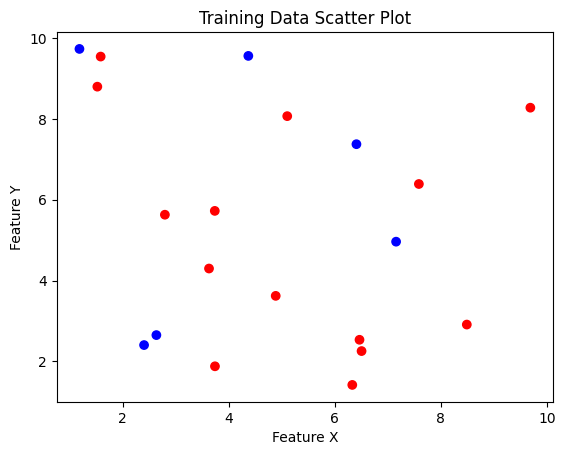

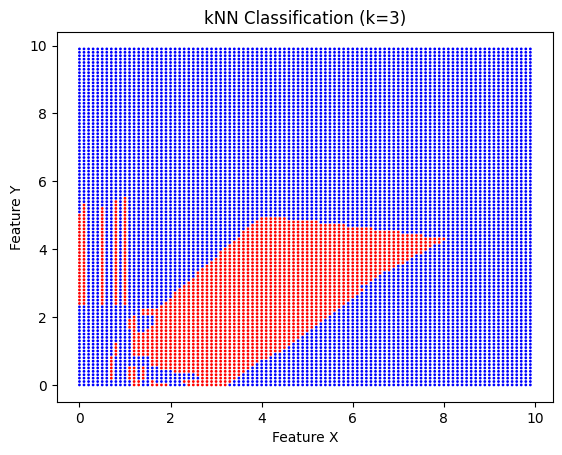

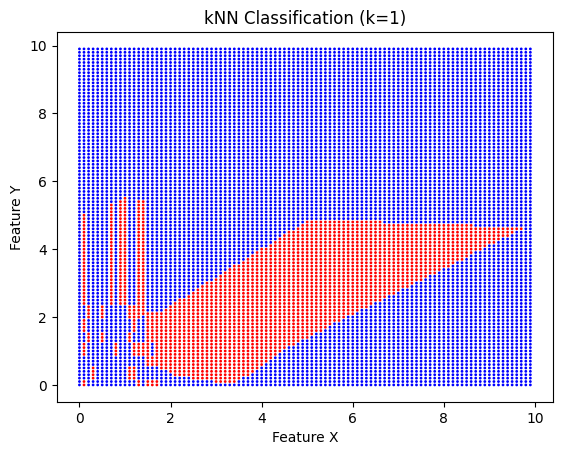

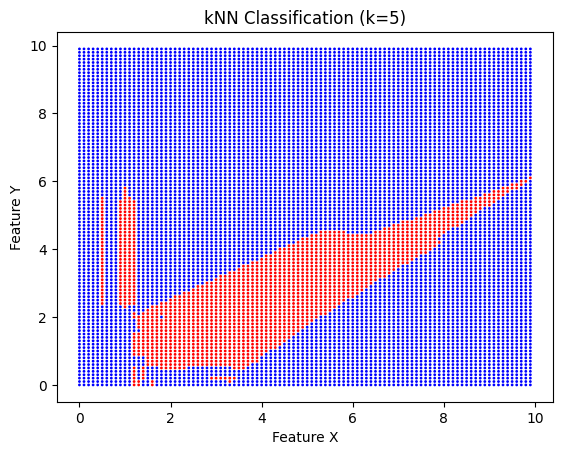

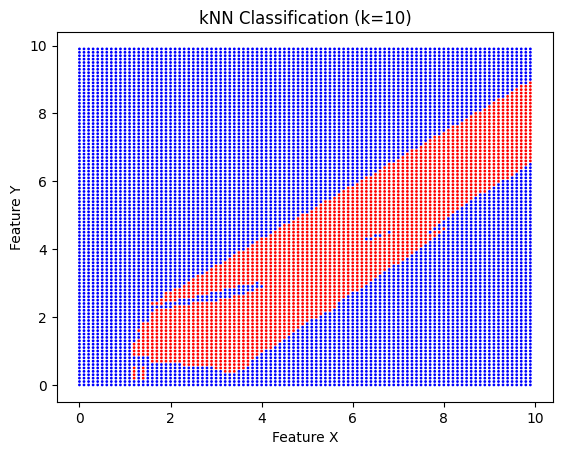

Best k value: {'n_neighbors': 6}


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

# Load dataset
filePath = "/content/Lab Session Data.xlsx"
xls = pd.ExcelFile(filePath)
marketingDf = pd.read_excel(xls, sheet_name="marketing_campaign")

# Data Preprocessing
marketingDf.dropna(inplace=True)
X = marketingDf[['Income', 'NumWebPurchases']]
y = marketingDf['Response']

# Train-test split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(XTrain)
XTestScaled = scaler.transform(XTest)

# Train kNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(XTrainScaled, yTrain)

# Predictions
yTrainPred = knn.predict(XTrainScaled)
yTestPred = knn.predict(XTestScaled)

# A1: Evaluate Confusion Matrix & Performance Metrics
def evaluateModel(yTrue, yPred, dataset):
    cm = confusion_matrix(yTrue, yPred)
    print(f"Confusion Matrix ({dataset}):\n", cm)
    print(f"Classification Report ({dataset}):\n", classification_report(yTrue, yPred))

evaluateModel(yTrain, yTrainPred, "Training")
evaluateModel(yTest, yTestPred, "Test")

# A2: Regression Metrics (Simulated Price Prediction)
yActual = marketingDf['Income'].values[:len(XTest)]  # Using Income as a proxy for price
yPred = knn.predict(XTestScaled)

mse = mean_squared_error(yActual, yPred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((yActual - yPred) / yActual)) * 100
r2 = r2_score(yActual, yPred)

print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

# A3: Scatter Plot of Training Data
np.random.seed(42)
XTrainSample = np.random.uniform(1, 10, (20, 2))
yTrainSample = np.random.choice([0, 1], size=20)
colors = ['blue' if label == 0 else 'red' for label in yTrainSample]
plt.scatter(XTrainSample[:, 0], XTrainSample[:, 1], c=colors)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Training Data Scatter Plot")
plt.show()

# A4: Generate Test Data and kNN Classification
testX = np.array([(x, y) for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])
testYPred = knn.predict(testX)
testColors = ['blue' if label == 0 else 'red' for label in testYPred]
plt.scatter(testX[:, 0], testX[:, 1], c=testColors, s=1)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification (k=3)")
plt.show()

# A5: Test for Various k values and display in order
kValues = [1, 5, 10]
for k in sorted(kValues):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrainScaled, yTrain)
    testYPred = knn.predict(testX)
    testColors = ['blue' if label == 0 else 'red' for label in testYPred]
    plt.scatter(testX[:, 0], testX[:, 1], c=testColors, s=1)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification (k={k})")
    plt.show()

# A6: Repeat A3 to A5 for project data (using marketing campaign dataset features)
# Already done above with 'Income' and 'NumWebPurchases' as features

# A7: Hyperparameter Tuning with GridSearchCV
paramGrid = {'n_neighbors': range(1, 20)}
gridSearch = GridSearchCV(KNeighborsClassifier(), paramGrid, cv=5)
gridSearch.fit(XTrainScaled, yTrain)
print("Best k value:", gridSearch.best_params_)
